In [139]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi"))))

import bpepi


In [140]:
import networkx as nx
import numpy as np

### Create the graph

In [377]:
N_graph=100
d=3
#p=0.01
#G = nx.erdos_renyi_graph(N_graph, p=0.01)
G = nx.random_regular_graph(d=3, n=N_graph)
#G = nx.balanced_tree(3,5)
N = G.number_of_nodes()
print(f"num of nodes {G.number_of_nodes()} ")
print(f"num of edges {G.number_of_edges()} ")
print(f"num of connected components {nx.number_connected_components(G)} ")

num of nodes 100 
num of edges 150 
num of connected components 1 


In [491]:
lam = 0.4

In [492]:
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam

### Generate the sources

In [493]:
ps = 0.005

In [494]:
status_nodes = []

In [495]:
s0 = []
flag=0
for i in range(N_graph):
    if np.random.rand() < ps : 
        s0.append(1)
        flag =1
    else : s0.append(0)

if (flag==0) : 
    s0[np.random.randint(0,N_graph)]=1
    print("No sources... adding a single random source")
status_nodes.append(s0)

### Generate the epidemics

In [496]:
mask = [1,0.8,0.6,0.4,0.2]
Delta = len(mask)

In [497]:
st = np.copy(s0)
t=0
counter = [mask.copy() for _ in range(N_graph)]
coeff_lam = np.ones(N_graph)
while (1 in status_nodes[-1]):
    st_minus_1 = np.copy(st)
    coeff_minus_1 = coeff_lam.copy()
    for i in range(N_graph):
        if st[i] == 1 :
            if not counter[i]: st[i]=2
            else :
                coeff_lam[i]=counter[i][0]
                counter[i].pop(0)
        elif st[i] == 0 :
            for j in nx.neighbors(G,i) :
                if (st_minus_1[j]==1 and np.random.rand() < G.edges[j,i]['lambda']*coeff_minus_1[j]): st[i]=1
    status_nodes.append(np.copy(st))
    t=t+1

In [498]:
t

21

In [499]:
sum(status_nodes[-1])

200

In [490]:
status_nodes[-1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [453]:
status_nodes[7]

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1])

In [160]:
for i in nx.neighbors(G,4):
    print(f"{i}")

676
532
315


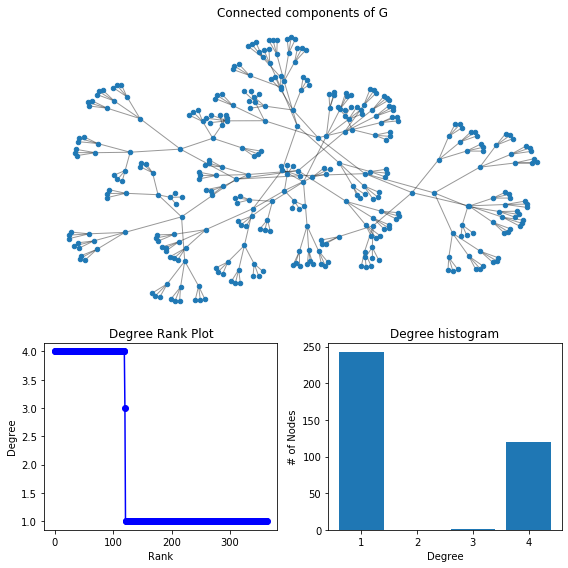

In [35]:
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [36]:
from bpepi.sim_on_cluster import generate_contacts
T=10
lamb_=1
contacts = generate_contacts(G, T, lamb_)
delta=1/N

In [37]:
from bpepi.fg import FactorGraph
fg_ = FactorGraph(N, T, contacts, [], delta)

In [38]:
fg_.update(tol=1e-10)

(7, 5.551115123125783e-17)

In [39]:
M = fg_.marginals()

In [31]:
M.shape

(1000, 12)

In [32]:
M[:,0].sum()/N

0.000999999999999997

In [23]:
M[[0,1]]

array([[1.00000000e+000, 6.06025082e-028, 4.83896753e-196,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 6.06025082e-028, 3.42985327e-157,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])